In [3]:
import os
def create_folder_if_not_exists(folder_path):
    """
    Creates a folder if it does not exist.

    :param folder_path: Path of the folder to create
    """
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder '{folder_path}' created.")
    else:
        print(f"Folder '{folder_path}' already exists.")
        
def file_exists(file_path):
    """
    Checks if a file exists.

    :param file_path: Path of the file to check
    :return: True if the file exists, False otherwise
    """
    return os.path.isfile(file_path)

folder_path = 'synthetique_databases'
create_folder_if_not_exists(folder_path)

Folder 'synthetique_databases' already exists.


In [31]:
import networkx as nx
import math
nb_nodes = 1000
nb_graphs = 8
list_p = [i for i in range(2, nb_graphs+2)]
for i in list_p:
    g = nx.fast_gnp_random_graph(nb_nodes, (math.log(nb_nodes)*i)/nb_nodes )
    file_path = folder_path + "/er_" + str(nb_nodes) + "_" + str(i) + ".edges"
    if not file_exists(file_path):
        nx.write_edgelist(g, file_path, data=False)

In [40]:
#launch pre-computations
import subprocess
algos = ["b-unrank", "ob-unrank", "i-unrank", "alias-unrank"]
for i in list_p:
    file_path = folder_path + "/er_" + str(nb_nodes) + "_" + str(i) + ".edges"
    g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    for alg in algos:
        subprocess.run(["./main", file_path ,"u", alg, str(0), str(1), str(1)]) 

Graph name : synthetique_databases/er_1000_2
Number of nodes : 1000 number of edges : 6946
preprocessing.....
cur 0 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
0.004000 ms.
end queries
Graph name : synthetique_databases/er_1000_2
Number of nodes : 1000 number of edges : 6946
preprocessing.....
cur 0 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
0.004000 ms.
end queries
Graph name : synthetique_databases/er_1000_2
Number of nodes : 1000 number of edges : 6946
preprocessing.....
cur 0 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
0.004000 ms.
end queries
Graph name : synthetique_databases/er_1000_2
Number of nodes : 1000 number of edges : 6946
preprocessing.....
cur 0 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
0.004000 ms.
end queries
Graph name : synthetique_databases/er_1000_3
Number of nodes : 1000 number of ed

In [9]:
import random
def random_pairs(n, g, max_tries = 1000):
    V = g.nodes()
    res = []
    nb = 0
    tr = 0
    while nb <n and tr < max_tries:
        pair = random.sample(V, k = 2)
        if nx.has_path(g,pair[0],pair[1]):
            res.append(pair)
            nb += 1
        tr+=1
    if tr == max_tries:
        return -1
    return res

def random_pairs_exact(n, V):
    res = []
    for i in range(n):
        pair = random.sample(V, k = 2)
        res.append(pair)
    return res

def read_float_from_file(file_path):
    """
    Reads a single float value from a file.

    :param file_path: Path to the file
    :return: The float value read from the file
    """
    with open(file_path, 'r') as file:
        value = file.readline().strip()
        print("val", value)
        return float(value)
    
import numpy as np

def calculate_mean_and_std(array):
    """
    Calculates the mean and standard deviation of an array.

    :param array: Input array
    :return: A tuple containing mean and standard deviation
    """
    mean = np.mean(array)
    std_dev = np.std(array)
    return mean, std_dev

In [41]:
def read_integers_from_file(file_path):
    """
    Reads a file containing one integer on each line into an array.

    :param file_path: Path to the file
    :return: A list of integers read from the file
    """
    integers = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip any whitespace and convert the line to an integer
            integers.append(int(line.strip()))
    return integers

def read_floats_from_file(file_path):
    """
    Reads a file containing one integer on each line into an array.

    :param file_path: Path to the file
    :return: A list of integers read from the file
    """
    doubles = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip any whitespace and convert the line to an integer
            doubles.append(float(line.strip()))
    return doubles


d_dist = { i: dict()  for i in list_p}
for i in list_p:
    for j in range(nb_nodes):
        file_path = folder_path + "/er_" + str(nb_nodes) + "_" + str(i) + "_b-unrank/distances_" + str(j) + ".csv"
        l = read_integers_from_file(file_path)
        for z in range(len(l)):
            if l[z] in d_dist[i]:
                d_dist[i][l[z]].append((j,z))
            else:
                d_dist[i][l[z]] = [(j,z)]

In [29]:
#launch simulations on er query time on average
nb_queries_per_pair = 500000
nb_pairs = 30
import subprocess
algos = ["b-unrank", "ob-unrank", "i-unrank", "alias-unrank"]
d = { i: {alg:[]   for alg in algos}  for i in list_p }
for i in list_p:
    file_path = folder_path + "/er_" + str(nb_nodes) + "_" + str(i) + ".edges"
    g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    V = list(g.nodes())
    l = random_pairs(nb_pairs, g)
    if l == -1:
        print("problem pair sampling")
        break
    for e in l:
        for alg in algos:
            subprocess.run(["./main", file_path ,"u", alg, str(e[0]), str(e[1]), str(nb_queries_per_pair)])
            file = "er_" + str(nb_nodes) + "_" + str(i) + "_" + alg + "/queries_time_"+ str(nb_queries_per_pair) + ".txt"
            d[i][alg].append(read_float_from_file(folder_path + "/" + file))
            

/tmp/ipykernel_13034/152781440.py:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  pair = random.sample(V, k = 2)


Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
187.075000 ms.
end queries
val 187.075000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
159.000000 ms.
end queries
val 159.000000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
159.334000 ms.
end queries
val 159.334000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
164.173000 ms.
end queries
val 164.173000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
120.147000 ms.
end queries
val 120.147000
Graph name : synthetique_databases/er_100_2
N

Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
119.620000 ms.
end queries
val 119.620000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
111.989000 ms.
end queries
val 111.989000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
113.062000 ms.
end queries
val 113.062000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
110.332000 ms.
end queries
val 110.332000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
119.802000 ms.
end queries
val 119.802000
Graph name : synthetique_databases/er_100_2
N

Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
151.911000 ms.
end queries
val 151.911000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
162.748000 ms.
end queries
val 162.748000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
106.522000 ms.
end queries
val 106.522000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
108.844000 ms.
end queries
val 108.844000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
104.035000 ms.
end queries
val 104.035000
Graph name : synthetique_databases/er_100_2
N

Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
110.254000 ms.
end queries
val 110.254000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
104.038000 ms.
end queries
val 104.038000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
119.384000 ms.
end queries
val 119.384000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
113.446000 ms.
end queries
val 113.446000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
112.326000 ms.
end queries
val 112.326000
Graph name : synthetique_databases/er_100_3
N

Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
154.581000 ms.
end queries
val 154.581000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
159.689000 ms.
end queries
val 159.689000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
123.891000 ms.
end queries
val 123.891000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
120.481000 ms.
end queries
val 120.481000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
115.813000 ms.
end queries
val 115.813000
Graph name : synthetique_databases/er_100_3
N

Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
119.704000 ms.
end queries
val 119.704000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
70.709000 ms.
end queries
val 70.709000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
75.095000 ms.
end queries
val 75.095000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
69.461000 ms.
end queries
val 69.461000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
85.271000 ms.
end queries
val 85.271000
Graph name : synthetique_databases/er_100_3
Number of

Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
84.233000 ms.
end queries
val 84.233000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
114.066000 ms.
end queries
val 114.066000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
111.994000 ms.
end queries
val 111.994000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
110.433000 ms.
end queries
val 110.433000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
119.835000 ms.
end queries
val 119.835000
Graph name : synthetique_databases/er_100_4
Num

Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
119.918000 ms.
end queries
val 119.918000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
111.634000 ms.
end queries
val 111.634000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
111.934000 ms.
end queries
val 111.934000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
110.619000 ms.
end queries
val 110.619000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
119.766000 ms.
end queries
val 119.766000
Graph name : synthetique_databases/er_100_4
N

Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
81.788000 ms.
end queries
val 81.788000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
70.825000 ms.
end queries
val 70.825000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
74.421000 ms.
end queries
val 74.421000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
69.222000 ms.
end queries
val 69.222000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
84.706000 ms.
end queries
val 84.706000
Graph name : synthetique_databases/er_100_4
Number of n

Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
117.532000 ms.
end queries
val 117.532000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
119.638000 ms.
end queries
val 119.638000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
70.625000 ms.
end queries
val 70.625000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
75.342000 ms.
end queries
val 75.342000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
69.559000 ms.
end queries
val 69.559000
Graph name : synthetique_databases/er_100_5
Nu

Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
117.667000 ms.
end queries
val 117.667000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
116.932000 ms.
end queries
val 116.932000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
120.003000 ms.
end queries
val 120.003000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
114.478000 ms.
end queries
val 114.478000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
114.445000 ms.
end queries
val 114.445000
Graph name : synthetique_databases/er_10

Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
117.832000 ms.
end queries
val 117.832000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
117.230000 ms.
end queries
val 117.230000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
116.349000 ms.
end queries
val 116.349000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
120.480000 ms.
end queries
val 120.480000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
119.811000 ms.
end queries
val 119.811000
Graph name : synthetique_databases/er_10

Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
84.173000 ms.
end queries
val 84.173000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
124.183000 ms.
end queries
val 124.183000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
124.470000 ms.
end queries
val 124.470000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
130.331000 ms.
end queries
val 130.331000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
122.148000 ms.
end queries
val 122.148000
Graph name : synthetique_databases/er_100_

Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
110.730000 ms.
end queries
val 110.730000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
119.983000 ms.
end queries
val 119.983000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
123.537000 ms.
end queries
val 123.537000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
132.187000 ms.
end queries
val 132.187000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
122.403000 ms.
end queries
val 122.403000
Graph name : synthetique_databases/er_10

Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
76.486000 ms.
end queries
val 76.486000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
69.527000 ms.
end queries
val 69.527000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
81.883000 ms.
end queries
val 81.883000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
70.427000 ms.
end queries
val 70.427000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
77.635000 ms.
end queries
val 77.635000
Graph name : synthetique_databases/er_100_7
Number

Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
164.781000 ms.
end queries
val 164.781000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
197.476000 ms.
end queries
val 197.476000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
160.491000 ms.
end queries
val 160.491000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
151.244000 ms.
end queries
val 151.244000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
105.613000 ms.
end queries
val 105.613000
Graph name : synthetique_databases/er_10

Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
188.838000 ms.
end queries
val 188.838000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
174.501000 ms.
end queries
val 174.501000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
199.136000 ms.
end queries
val 199.136000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
193.110000 ms.
end queries
val 193.110000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
163.361000 ms.
end queries
val 163.361000
Graph name : synthetique_databases/er_10

Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
177.908000 ms.
end queries
val 177.908000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
164.253000 ms.
end queries
val 164.253000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
184.523000 ms.
end queries
val 184.523000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
177.503000 ms.
end queries
val 177.503000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
196.486000 ms.
end queries
val 196.486000
Graph name : synthetique_databases/er_10

Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
76.085000 ms.
end queries
val 76.085000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
72.667000 ms.
end queries
val 72.667000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
81.545000 ms.
end queries
val 81.545000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
78.560000 ms.
end queries
val 78.560000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
75.823000 ms.
end queries
val 75.823000
Graph name : synthetique_databases/er_100_8
Number

Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
127.336000 ms.
end queries
val 127.336000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
130.053000 ms.
end queries
val 130.053000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
125.723000 ms.
end queries
val 125.723000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
170.914000 ms.
end queries
val 170.914000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
70.755000 ms.
end queries
val 70.755000
Graph name : synthetique_databases/er_100_

Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
71.545000 ms.
end queries
val 71.545000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
71.844000 ms.
end queries
val 71.844000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
84.501000 ms.
end queries
val 84.501000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
134.680000 ms.
end queries
val 134.680000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
134.258000 ms.
end queries
val 134.258000
Graph name : synthetique_databases/er_100_9
Nu

Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
144.048000 ms.
end queries
val 144.048000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
165.066000 ms.
end queries
val 165.066000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
141.656000 ms.
end queries
val 141.656000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
155.456000 ms.
end queries
val 155.456000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
176.445000 ms.
end queries
val 176.445000
Graph name : synthetique_databases/er_10

Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
101.190000 ms.
end queries
val 101.190000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
198.405000 ms.
end queries
val 198.405000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
133.671000 ms.
end queries
val 133.671000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
129.002000 ms.
end queries
val 129.002000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
120.783000 ms.
end queries
val 120.783000
Graph name : synthetique_databases/er_10

In [12]:
#launch simulations on er query time on long distance
# last third of distances
pair_dist = "long"
max_dist = { i: max(d_dist[i])  for i in list_p  }


nb_queries_per_pair = 500000
nb_pairs = 30
import subprocess
algos = ["b-unrank", "ob-unrank", "i-unrank", "alias-unrank"]
d = { i: {alg:[]   for alg in algos}  for i in list_p }
for i in list_p:
    file_path = folder_path + "/er_" + str(nb_nodes) + "_" + str(i) + ".edges"
    g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    V = list(g.nodes())
    pairs = []
    if pair_dist == "long":
        for zz in range(int(max_dist[i]*2/3), max_dist[i]):
            pairs += d_dist[i][zz]
    if pair_dist == "medium":
        for zz in range(int(max_dist[i]*1/3), max_dist[i]*2/3):
            pairs += d_dist[i][zz]
    if pair_dist == "short":
        for zz in range(int(max_dist[i]), max_dist[i]*1/3):
            pairs += d_dist[i][zz]
    l = random_pairs_exact(nb_pairs, pairs)
    if l == -1:
        print("problem pair sampling")
        break
    for e in l:
        for alg in algos:
            subprocess.run(["./main", file_path ,"u", alg, str(e[0]), str(e[1]), str(nb_queries_per_pair)])
            file = "er_" + str(nb_nodes) + "_" + str(i) + "_" + alg + "/queries_time_"+ str(nb_queries_per_pair) + ".txt"
            d[i][alg].append(read_float_from_file(folder_path + "/" + file))
            

Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
49.337000 ms.
end queries
val 49.337000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
37.091000 ms.
end queries
val 37.091000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
34.346000 ms.
end queries
val 34.346000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
39.335000 ms.
end queries
val 39.335000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
34.376000 ms.
end queries
val 34.376000
Graph name : synthetique_databases/er_100_2
Number of n

Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
36.228000 ms.
end queries
val 36.228000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
34.201000 ms.
end queries
val 34.201000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
34.431000 ms.
end queries
val 34.431000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
38.241000 ms.
end queries
val 38.241000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
34.230000 ms.
end queries
val 34.230000
Graph name : synthetique_databases/er_100_2
Number of n

Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
39.255000 ms.
end queries
val 39.255000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
34.469000 ms.
end queries
val 34.469000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
34.339000 ms.
end queries
val 34.339000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
37.531000 ms.
end queries
val 37.531000
Graph name : synthetique_databases/er_100_2
Number of nodes : 100 number of edges : 458
preprocessing for this type is already present
start queries
34.451000 ms.
end queries
val 34.451000
Graph name : synthetique_databases/er_100_2
Number of n

Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
36.199000 ms.
end queries
val 36.199000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
34.516000 ms.
end queries
val 34.516000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
34.519000 ms.
end queries
val 34.519000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
37.001000 ms.
end queries
val 37.001000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
34.558000 ms.
end queries
val 34.558000
Graph name : synthetique_databases/er_100_3
Number of n

Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
36.970000 ms.
end queries
val 36.970000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
34.343000 ms.
end queries
val 34.343000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
34.787000 ms.
end queries
val 34.787000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
37.193000 ms.
end queries
val 37.193000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
34.504000 ms.
end queries
val 34.504000
Graph name : synthetique_databases/er_100_3
Number of n

Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
36.763000 ms.
end queries
val 36.763000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
34.338000 ms.
end queries
val 34.338000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
34.535000 ms.
end queries
val 34.535000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
38.777000 ms.
end queries
val 38.777000
Graph name : synthetique_databases/er_100_3
Number of nodes : 100 number of edges : 721
preprocessing for this type is already present
start queries
34.629000 ms.
end queries
val 34.629000
Graph name : synthetique_databases/er_100_3
Number of n

Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
39.846000 ms.
end queries
val 39.846000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
36.183000 ms.
end queries
val 36.183000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
34.449000 ms.
end queries
val 34.449000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
37.129000 ms.
end queries
val 37.129000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
34.554000 ms.
end queries
val 34.554000
Graph name : synthetique_databases/er_100_4
Number of n

Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
38.097000 ms.
end queries
val 38.097000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
34.512000 ms.
end queries
val 34.512000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
35.028000 ms.
end queries
val 35.028000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
40.831000 ms.
end queries
val 40.831000
Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
34.596000 ms.
end queries
val 34.596000
Graph name : synthetique_databases/er_100_4
Number of n

Graph name : synthetique_databases/er_100_4
Number of nodes : 100 number of edges : 917
preprocessing for this type is already present
start queries
42.898000 ms.
end queries
val 42.898000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
41.774000 ms.
end queries
val 41.774000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
39.816000 ms.
end queries
val 39.816000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
39.008000 ms.
end queries
val 39.008000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
37.204000 ms.
end queries
val 37.204000
Graph name : synthetique_databases/er_100_5
Number 

Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
35.963000 ms.
end queries
val 35.963000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
34.608000 ms.
end queries
val 34.608000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
34.364000 ms.
end queries
val 34.364000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
38.388000 ms.
end queries
val 38.388000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
35.039000 ms.
end queries
val 35.039000
Graph name : synthetique_databases/er_100_5
Number

Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
37.906000 ms.
end queries
val 37.906000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
34.430000 ms.
end queries
val 34.430000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
36.389000 ms.
end queries
val 36.389000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
37.798000 ms.
end queries
val 37.798000
Graph name : synthetique_databases/er_100_5
Number of nodes : 100 number of edges : 1123
preprocessing for this type is already present
start queries
34.321000 ms.
end queries
val 34.321000
Graph name : synthetique_databases/er_100_5
Number

Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
38.380000 ms.
end queries
val 38.380000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
34.602000 ms.
end queries
val 34.602000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
34.487000 ms.
end queries
val 34.487000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
40.166000 ms.
end queries
val 40.166000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
34.554000 ms.
end queries
val 34.554000
Graph name : synthetique_databases/er_100_6
Number

Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
40.929000 ms.
end queries
val 40.929000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
34.433000 ms.
end queries
val 34.433000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
34.449000 ms.
end queries
val 34.449000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
40.445000 ms.
end queries
val 40.445000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
34.727000 ms.
end queries
val 34.727000
Graph name : synthetique_databases/er_100_6
Number

Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
44.296000 ms.
end queries
val 44.296000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
34.573000 ms.
end queries
val 34.573000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
34.290000 ms.
end queries
val 34.290000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
38.738000 ms.
end queries
val 38.738000
Graph name : synthetique_databases/er_100_6
Number of nodes : 100 number of edges : 1398
preprocessing for this type is already present
start queries
34.378000 ms.
end queries
val 34.378000
Graph name : synthetique_databases/er_100_6
Number

Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
39.796000 ms.
end queries
val 39.796000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
34.696000 ms.
end queries
val 34.696000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
34.354000 ms.
end queries
val 34.354000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
38.676000 ms.
end queries
val 38.676000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
34.335000 ms.
end queries
val 34.335000
Graph name : synthetique_databases/er_100_7
Number

Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
36.554000 ms.
end queries
val 36.554000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
34.390000 ms.
end queries
val 34.390000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
34.493000 ms.
end queries
val 34.493000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
36.329000 ms.
end queries
val 36.329000
Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
34.392000 ms.
end queries
val 34.392000
Graph name : synthetique_databases/er_100_7
Number

Graph name : synthetique_databases/er_100_7
Number of nodes : 100 number of edges : 1652
preprocessing for this type is already present
start queries
39.346000 ms.
end queries
val 39.346000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
34.280000 ms.
end queries
val 34.280000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
34.738000 ms.
end queries
val 34.738000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
37.042000 ms.
end queries
val 37.042000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
34.933000 ms.
end queries
val 34.933000
Graph name : synthetique_databases/er_100_8
Number

Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
40.442000 ms.
end queries
val 40.442000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
43.399000 ms.
end queries
val 43.399000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
46.006000 ms.
end queries
val 46.006000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
41.730000 ms.
end queries
val 41.730000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
40.405000 ms.
end queries
val 40.405000
Graph name : synthetique_databases/er_100_8
Number

Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
41.623000 ms.
end queries
val 41.623000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
51.657000 ms.
end queries
val 51.657000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
36.710000 ms.
end queries
val 36.710000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
37.085000 ms.
end queries
val 37.085000
Graph name : synthetique_databases/er_100_8
Number of nodes : 100 number of edges : 1768
preprocessing for this type is already present
start queries
43.614000 ms.
end queries
val 43.614000
Graph name : synthetique_databases/er_100_8
Number

Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
40.626000 ms.
end queries
val 40.626000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
35.443000 ms.
end queries
val 35.443000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
34.333000 ms.
end queries
val 34.333000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
41.185000 ms.
end queries
val 41.185000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
34.455000 ms.
end queries
val 34.455000
Graph name : synthetique_databases/er_100_9
Number

Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
36.599000 ms.
end queries
val 36.599000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
35.613000 ms.
end queries
val 35.613000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
52.033000 ms.
end queries
val 52.033000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
57.805000 ms.
end queries
val 57.805000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
48.128000 ms.
end queries
val 48.128000
Graph name : synthetique_databases/er_100_9
Number

Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
65.025000 ms.
end queries
val 65.025000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
46.820000 ms.
end queries
val 46.820000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
40.348000 ms.
end queries
val 40.348000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
58.951000 ms.
end queries
val 58.951000
Graph name : synthetique_databases/er_100_9
Number of nodes : 100 number of edges : 2016
preprocessing for this type is already present
start queries
67.234000 ms.
end queries
val 67.234000
Graph name : synthetique_databases/er_100_9
Number

In [59]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_chart(data):
    """
    Plots a bar chart where the x-axis is represented by the keys of the dictionary.
    Each key in the dictionary maps to another dictionary with 4 keys representing bars.
    The values are tuples (mean, standard deviation).

    :param data: Dictionary containing the data to plot
    """
    categories = list(data.keys())
    subcategories = list(next(iter(data.values())).keys())
    
    # Number of groups and bars per group
    n_groups = len(categories)
    n_bars = len(subcategories)
    
    # Create figure and axis
    fig, ax = plt.subplots()

    # Bar width
    bar_width = 0.2

    # X locations for the groups
    index = np.arange(n_groups)
    
    # Iterate through each subcategory and plot the bars
    for i, subcategory in enumerate(subcategories):
        means = [data[category][subcategory][0] for category in categories]
        std_devs = [data[category][subcategory][1] for category in categories]
        ax.bar(index + i * bar_width, means, bar_width, yerr=std_devs, label=subcategory)

    # Add labels, title, and legend
    ax.set_xlabel('Category')
    ax.set_ylabel('Values')
    ax.set_title('Bar chart with means and standard deviations '+ pair_dist)
    ax.set_xticks(index + bar_width * (n_bars - 1) / 2)
    ax.set_xticklabels(categories)
    ax.legend()

    # Show plot
    plt.tight_layout()
    plt.savefig('query_time.pdf')
    plt.show()

# # Example usage:
# data = {
#     'A': {'bar1': (5, 1), 'bar2': (6, 1.5), 'bar3': (7, 2), 'bar4': (8, 2.5)},
#     'B': {'bar1': (4, 1.2), 'bar2': (5, 1.3), 'bar3': (6, 1.8), 'bar4': (7, 2.1)},
#     'C': {'bar1': (3, 0.8), 'bar2': (4, 1.1), 'bar3': (5, 1.6), 'bar4': (6, 2.0)}
# }

# data = {i:  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in list_p}

# plot_bar_chart(data)

In [60]:
#launch bars on pre-computations
import subprocess
algos = ["b-unrank", "ob-unrank", "i-unrank", "alias-unrank"]
d_pre = { i: {alg:[]   for alg in algos}  for i in list_p }
for i in list_p:
    for alg in algos:
        file = "er_" + str(nb_nodes) + "_" + str(i) + "_" + alg + "/pre_time.csv"
        l = read_integers_from_file(folder_path+"/"+file)
        d_pre[i][alg] = l

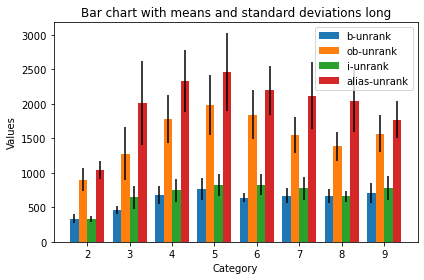

In [61]:
data = {i:  { e: calculate_mean_and_std(d_pre[i][e])   for e in algos }  for i in list_p}
plot_bar_chart(data)